In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
customers_df=pd.read_csv('olist_customers_dataset.csv')


In [88]:
customers_df.shape

(99441, 5)

In [89]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [90]:
customers_df['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [91]:
orders_df=pd.read_csv('olist_orders_dataset.csv')

In [92]:
orders_df.shape

(99441, 8)

In [93]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [94]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [95]:
#Filtering out records where order is not delivered
orders_df=orders_df[orders_df['order_status']=='delivered']

In [96]:
#filling null values of order_approved_at column with order_purchase_timestamp
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].combine_first(orders_df['order_estimated_delivery_date'])

In [97]:
orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [98]:
orders_df = orders_df.drop(columns=['order_delivered_carrier_date','order_approved_at'])

In [99]:
products_df=pd.read_csv('olist_products_dataset.csv')

In [100]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [101]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [102]:
products_df = products_df.fillna(value={"product_category_name": "unknown"})

In [103]:
columns_to_drop = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

products_df = products_df.drop(columns=columns_to_drop)

In [104]:
order_payments=pd.read_csv('olist_order_payments_dataset.csv')

In [105]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [106]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [107]:
order_items_df=pd.read_csv('olist_order_items_dataset.csv')

In [108]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [109]:
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv', encoding='latin1')

In [110]:
reviews_df.shape

(99224, 7)

In [111]:
reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58277
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [112]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18-01-2018 00:00,18-01-2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10-03-2018 00:00,11-03-2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17-02-2018 00:00,18-02-2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,I received it well before the stipulated deadl...,21-04-2017 00:00,21-04-2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations lannister stores I loved shopp...,01-03-2018 00:00,02-03-2018 10:26


In [113]:
reviews_df.shape

(99224, 7)

In [114]:
reviews_df.drop(columns=['review_comment_title'],inplace=True)

In [115]:
reviews_df = reviews_df.dropna(subset=['review_comment_message'])

In [116]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,I received it well before the stipulated deadl...,21-04-2017 00:00,21-04-2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Congratulations lannister stores I loved shopp...,01-03-2018 00:00,02-03-2018 10:26
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,efficient device. On the website the brand of ...,22-05-2018 00:00,23-05-2018 16:45
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"But a little slow...for the price, it's good.",16-02-2018 00:00,20-02-2018 10:52
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Reliable seller, ok product and delivery on time.",23-05-2018 00:00,24-05-2018 03:00


In [117]:
reviews_df.shape

(40947, 6)

In [118]:
sellers_df=pd.read_csv('olist_sellers_dataset.csv')


In [119]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [120]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [121]:
product_category_name_translation_df=pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [122]:
product_category_name_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [123]:
order_items_df=pd.read_csv('olist_order_items_dataset.csv')
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [124]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [125]:
orders_df['order_id'] = orders_df['order_id'].astype(str)
order_items_df['order_id'] = order_items_df['order_id'].astype(str)
order_payments['order_id'] = order_payments['order_id'].astype(str)
customers_df['customer_id'] = customers_df['customer_id'].astype(str)
reviews_df['order_id'] = reviews_df['order_id'].astype(str)
products_df['product_id'] = products_df['product_id'].astype(str)
sellers_df['seller_id'] = sellers_df['seller_id'].astype(str)
product_category_name_translation_df['product_category_name'] = product_category_name_translation_df['product_category_name'].astype(str)

In [126]:
print(orders_df.dtypes)
print(order_items_df.dtypes)
print(order_payments.dtypes)
print(customers_df.dtypes)
print(reviews_df.dtypes)
print(products_df.dtypes)
print(sellers_df.dtypes)
print(product_category_name_translation_df.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
review_id                  object
order_id                   object
review_score                int64
review_comment_message     object
review_creation_

In [127]:
merged_df = (orders_df
             .merge(order_items_df, on='order_id', how='inner')
             .merge(order_payments, on='order_id', how='inner')
             .merge(customers_df, on='customer_id', how='inner')
             .merge(reviews_df, on='order_id', how='inner')
             .merge(products_df, on='product_id', how='inner')
             .merge(sellers_df, on='seller_id', how='inner')
             .merge(product_category_name_translation_df, on='product_category_name', how='inner'))

In [128]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,a54f0611adc9ed256b57ede6b6eb5114,4,"I haven't tested the product yet, but it arriv...",11-10-2017 00:00,12-10-2017 03:43,utilidades_domesticas,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,a54f0611adc9ed256b57ede6b6eb5114,4,"I haven't tested the product yet, but it arriv...",11-10-2017 00:00,12-10-2017 03:43,utilidades_domesticas,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,a54f0611adc9ed256b57ede6b6eb5114,4,"I haven't tested the product yet, but it arriv...",11-10-2017 00:00,12-10-2017 03:43,utilidades_domesticas,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,8d5266042046a06655c8db133d120ba5,4,The product is very good.,08-08-2018 00:00,08-08-2018 18:37,perfumaria,31570,belo horizonte,SP,perfumery
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,...,359d03e676b3c069f62cadba8dd3f6e8,5,The product was exactly what I expected and wa...,03-12-2017 00:00,05-12-2017 19:21,pet_shop,31842,belo horizonte,MG,pet_shop


In [129]:
merged_df.to_csv('merged_data.csv', index=False)

In [130]:
merged_df.shape

(47331, 30)

In [131]:
df=pd.read_csv('merged_data.csv')

In [132]:
df.iloc[1]

order_id                                          e481f51cbdc54678b7cc49136f2d6af7
customer_id                                       9ef432eb6251297304e76186b10a928d
order_status                                                             delivered
order_purchase_timestamp                                       2017-10-02 10:56:33
order_delivered_customer_date                                  2017-10-10 21:25:13
order_estimated_delivery_date                                  2017-10-18 00:00:00
order_item_id                                                                    1
product_id                                        87285b34884572647811a353c7ac498a
seller_id                                         3504c0cb71d7fa48d967e0e4c94d59d9
shipping_limit_date                                            2017-10-06 11:07:15
price                                                                        29.99
freight_value                                                                 8.72
paym

In [133]:
df['product_category_name_english'].nunique()

71

In [134]:
df_comments = df.loc[:, ['review_score', 'review_comment_message']]
df_comments = df_comments.dropna(subset=['review_comment_message'])
df_comments = df_comments.reset_index(drop=True)
print(f'Dataset shape: {df_comments.shape}')
df_comments.columns = ['score', 'comment']
df_comments.head()

Dataset shape: (47331, 2)


,score,comment
0,4,"I haven't tested the product yet, but it arriv..."
1,4,"I haven't tested the product yet, but it arriv..."
2,4,"I haven't tested the product yet, but it arriv..."
3,4,The product is very good.
4,5,The product was exactly what I expected and wa...


# Regular Expressions

In [135]:
#Breakline and Carriage Return
import re
def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

In [136]:
# Creating a list of comment reviews
reviews = list(df_comments['comment'].values)

# Applying RegEx
reviews_breakline = re_breakline(reviews)
df_comments['re_breakline'] = reviews_breakline

def print_step_result(original_list, modified_list, idx_list):
    """
    Prints the original and modified text at specified indices for verification.

    Args:
    original_list: list
        List containing original text.
    
    modified_list: list
        List containing modified text.
    
    idx_list: list
        List of indices to be verified.
    """
    for idx in idx_list:
        print(f"Original[{idx}]: {original_list[idx]}")
        print(f"Modified[{idx}]: {modified_list[idx]}")
        print()

# Verifying results
print_step_result(reviews, reviews_breakline, idx_list=[0, 9, 49])

Original[0]: I haven't tested the product yet, but it arrived correct and in good condition. Just the box that came very dented and damaged, which will be annoying, as it is a gift.
Modified[0]: I haven't tested the product yet, but it arrived correct and in good condition. Just the box that came very dented and damaged, which will be annoying, as it is a gift.

Original[9]: the post office is on strike... I didn't receive any notice of delay, but in any case the company responsible should give some response about the delay.
Modified[9]: the post office is on strike... I didn't receive any notice of delay, but in any case the company responsible should give some response about the delay.

Original[49]: It arrived ahead of schedule and the product is exactly what I wanted
Modified[49]: It arrived ahead of schedule and the product is exactly what I wanted



In [137]:
#Sites and Hiperlinks
def re_hiperlinks(text_list):
    """
    Args:
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

<>:10: SyntaxWarning: invalid escape sequence '\('
<>:10: SyntaxWarning: invalid escape sequence '\('
C:\Users\Hp\AppData\Local\Temp\ipykernel_14220\3046921371.py:10: SyntaxWarning: invalid escape sequence '\('
  pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'


In [138]:
# Applying RegEx
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
df_comments['re_hiperlinks'] = reviews_hiperlinks

# Verifying results
print_step_result(reviews_breakline, reviews_hiperlinks, idx_list=[10796, 12782])

Original[10796]: Excellent, it looks beautiful on my Boris, I highly recommend it. Great quality merchandise, products were delivered before the scheduled deadline
Modified[10796]: Excellent, it looks beautiful on my Boris, I highly recommend it. Great quality merchandise, products were delivered before the scheduled deadline

Original[12782]: medium quality product
Modified[12782]: medium quality product



In [139]:
#Dates
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' data ', r) for r in text_list]

<>:10: SyntaxWarning: invalid escape sequence '\/'
<>:10: SyntaxWarning: invalid escape sequence '\/'
C:\Users\Hp\AppData\Local\Temp\ipykernel_14220\3215900726.py:10: SyntaxWarning: invalid escape sequence '\/'
  pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'


In [140]:
# Applying RegEx
reviews_dates = re_dates(reviews_hiperlinks)
df_comments['re_dates'] = reviews_dates

# Verifying results
print_step_result(reviews_hiperlinks, reviews_dates, idx_list=[26665, 41497, 41674])

Original[26665]: The product I received is not the color I purchased. I have already requested a return.
Modified[26665]: The product I received is not the color I purchased. I have already requested a return.

Original[41497]: I received it before the deadline
Modified[41497]: I received it before the deadline

Original[41674]: I purchased one product but received another.
Modified[41674]: I purchased one product but received another.



In [141]:
#Money
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Hp\AppData\Local\Temp\ipykernel_14220\2493006721.py:10: SyntaxWarning: invalid escape sequence '\$'
  pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'


In [142]:
# Applying RegEx
reviews_money = re_money(reviews_dates)
df_comments['re_money'] = reviews_money

# Verifying results
print_step_result(reviews_dates, reviews_money, idx_list=[26020, 33297, 32998])

Original[26020]: The delivery was made to a neighbor's house and the courier did not notify us.
Modified[26020]: The delivery was made to a neighbor's house and the courier did not notify us.

Original[33297]: 1 unit is missing
Modified[33297]: 1 unit is missing

Original[32998]: Satisfactory doll
Modified[32998]: Satisfactory doll



In [143]:
#Numbers
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]

In [144]:
# Applying RegEx
reviews_numbers = re_numbers(reviews_money)
df_comments['re_numbers'] = reviews_numbers

# Verifying results
print_step_result(reviews_money, reviews_numbers, idx_list=[68])

Original[68]: I think I should send the products together, since on the invoice they were together and they are the same lights and not send them almost a week later due to the difference.
Modified[68]: I think I should send the products together, since on the invoice they were together and they are the same lights and not send them almost a week later due to the difference.



In [145]:
#Negation

def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', r) for r in text_list]

In [146]:
# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

# Verifying results
print_step_result(reviews_numbers, reviews_negation, idx_list=[4783, 4627, 4856, 4904])

Original[4783]: It's been more than  numero  month since I placed the order, paid by invoice and I haven't received the product. Don't buy it.
Modified[4783]: It's been more than  numero  month since I placed the order, paid by invoice and I haven't received the product. Don't buy it.

Original[4627]: As for the product, nothing to complain about, but the Targaryen delivery company took a long time to separate and deliver the product, I bought another product from another company and it arrived much earlier!
Modified[4627]: As for the product, nothing to complain about, but the Targaryen delivery company took a long time to separate and deliver the product, I bought another product from another company and it arrived much earlier!

Original[4856]: Fragile product, came chipped and just broke on the first attempt to use.
Modified[4856]: Fragile product, came chipped and just broke on the first attempt to use.

Original[4904]: I did not receive my product!
Modified[4904]: I did not recei

In [147]:
#Special Characters
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]

<>:10: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Hp\AppData\Local\Temp\ipykernel_14220\2656665227.py:10: SyntaxWarning: invalid escape sequence '\W'
  return [re.sub('\W', ' ', r) for r in text_list]


In [148]:
# Applying RegEx
reviews_special_chars = re_special_chars(reviews_negation)
df_comments['re_special_chars'] = reviews_special_chars

# Verifying results
print_step_result(reviews_negation, reviews_special_chars, idx_list=[45, 135, 234])

Original[45]: The store offered the other products but did not deliver.
Modified[45]: The store offered the other products but did not deliver 

Original[135]: I have another sling from another brand with much softer, more malleable and pleasant fabric
Modified[135]: I have another sling from another brand with much softer  more malleable and pleasant fabric

Original[234]: I've always bought from Baratheon and never had any problems, but the last two purchases left something to be desired. .
Modified[234]: I ve always bought from Baratheon and never had any problems  but the last two purchases left something to be desired   



In [149]:
# Additional Whitespaces
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Hp\AppData\Local\Temp\ipykernel_14220\517935289.py:10: SyntaxWarning: invalid escape sequence '\s'
  white_spaces = [re.sub('\s+', ' ', r) for r in text_list]


In [150]:
# Applying RegEx
reviews_whitespaces = re_whitespaces(reviews_special_chars)
df_comments['re_whitespaces'] = reviews_whitespaces

# Verifying results
print_step_result(reviews_special_chars, reviews_whitespaces, idx_list=[3, 4, -1])

Original[3]: The product is very good 
Modified[3]: The product is very good

Original[4]: The product was exactly what I expected and was described on the website and arrived well before the expected date 
Modified[4]: The product was exactly what I expected and was described on the website and arrived well before the expected date

Original[-1]: Only  numero  was delivered  I want to know about the other product 
Modified[-1]: Only numero was delivered I want to know about the other product



In [151]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [153]:
#Stopwords
from nltk.corpus import stopwords

# Examples of some English stopwords
en_stopwords = stopwords.words('english')
print(f'Total English stopwords in the nltk.corpus module: {len(en_stopwords)}')
en_stopwords[:10]

Total English stopwords in the nltk.corpus module: 179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [154]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Ensure stopwords data is downloaded
nltk.download('stopwords')

# Define the function to remove stopwords and convert to lowercase
def stopwords_removal(text, cached_stopwords=stopwords.words('english')):
    """
    Removes stopwords from a given text and converts it to lowercase.

    Args:
    ----------
    text: str
        The text from which stopwords will be removed.
    cached_stopwords: list
        A list of stopwords to remove from the text. Default is English stopwords from NLTK.
    
    Returns:
    ----------
    str
        The text with stopwords removed and converted to lowercase.
    """
    # Ensure the input is a string
    if not isinstance(text, str):
        return text
    
    # Tokenize the text, remove stopwords, and convert to lowercase
    filtered_words = [word.lower() for word in text.split() if word.lower() not in cached_stopwords]
    # Join words back into a single string
    return ' '.join(filtered_words)

# Load English stopwords
cached_stopwords = stopwords.words('english')


# Apply the function to the customer_comments column
df_comments['no_stopwords'] = df_comments['re_whitespaces'].apply(lambda x: stopwords_removal(x, cached_stopwords))

# Print the DataFrame with the new column
print("\nDataFrame with Stopwords Removed and Lowercased:")
df_comments[['re_whitespaces', 'no_stopwords']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



DataFrame with Stopwords Removed and Lowercased:


,re_whitespaces,no_stopwords
0,I haven t tested the product yet but it arrive...,tested product yet arrived correct good condit...
1,I haven t tested the product yet but it arrive...,tested product yet arrived correct good condit...
2,I haven t tested the product yet but it arrive...,tested product yet arrived correct good condit...
3,The product is very good,product good
4,The product was exactly what I expected and wa...,product exactly expected described website arr...
...,...,...
47326,It is not a mini cajon it is a shaker that is ...,mini cajon shaker rattle imitates cajon terrible
47327,It s just a piece that arrived cracked but it ...,piece arrived cracked ok lol
47328,It was delivered ahead of schedule,delivered ahead schedule
47329,Only numero was delivered I want to know about...,numero delivered want know product


In [155]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Ensure NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the part of speech tag
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Define the function to apply lemmatization
def lemmatization_process(text, lemmatizer=WordNetLemmatizer()):
    """
    Applies lemmatization to the given text.

    Args:
    ----------
    text: str
        The text to be lemmatized.
    lemmatizer: object
        The lemmatizer to use for lemmatizing words. Default is WordNetLemmatizer.
    
    Returns:
    ----------
    str
        The text with lemmatization applied.
    """
    
    if not isinstance(text, str):
        return text
    
    # Apply lemmatization
    return ' '.join(lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split())

# Apply the function to the customer_comments column
df_comments['lemmatized_comments'] = df_comments['no_stopwords'].apply(lambda x: lemmatization_process(x, lemmatizer))

# Print the DataFrame with the new column
print("\nDataFrame with Lemmatization Applied:")
df_comments[['no_stopwords', 'lemmatized_comments','score']]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



DataFrame with Lemmatization Applied:


,no_stopwords,lemmatized_comments,score
0,tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4
1,tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4
2,tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4
3,product good,product good,4
4,product exactly expected described website arr...,product exactly expect described website arriv...,5
...,...,...,...
47326,mini cajon shaker rattle imitates cajon terrible,mini cajon shaker rattle imitates cajon terrible,1
47327,piece arrived cracked ok lol,piece arrive crack ok lol,4
47328,delivered ahead schedule,deliver ahead schedule,5
47329,numero delivered want know product,numero deliver want know product,2


In [156]:
df_comments=df_comments[['comment','no_stopwords','lemmatized_comments','score']]

In [157]:
df_comments.head(5)

,comment,no_stopwords,lemmatized_comments,score
0,"I haven't tested the product yet, but it arriv...",tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4
1,"I haven't tested the product yet, but it arriv...",tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4
2,"I haven't tested the product yet, but it arriv...",tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4
3,The product is very good.,product good,product good,4
4,The product was exactly what I expected and wa...,product exactly expected described website arr...,product exactly expect described website arriv...,5


In [158]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   comment              47331 non-null  object
 1   no_stopwords         47331 non-null  object
 2   lemmatized_comments  47331 non-null  object
 3   score                47331 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


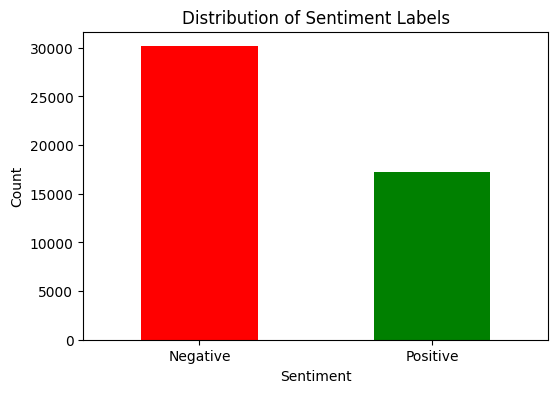

In [159]:
#Labelling
import pandas as pd
import matplotlib.pyplot as plt

# Assign labels based on review_score
df_comments['label'] = df_comments['score'].apply(lambda x: 1 if x in [4, 5] else 0)

# Display the labeled DataFrame
# print("\nLabeled DataFrame:")
# df_comments.head()

# Visualize the distribution of positive and negative comments
plt.figure(figsize=(6, 4))
df_comments['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

In [160]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure the lemmatized_comments column is filled
# df_comments['lemmatized_comments'] = df_comments['no_stopwords']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the lemmatized_comments column
x_vectorized = tfidf_vectorizer.fit_transform(df_comments['lemmatized_comments'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(x_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Get the feature names from the TF-IDF vectorizer
features = tfidf_vectorizer.get_feature_names_out()

# Filter out columns where the TF-IDF score is all zeros
non_zero_features = [feature for feature in features if (tfidf_df[feature] != 0).any()]
tfidf_df_filtered = tfidf_df[non_zero_features]

# Concatenate the TF-IDF DataFrame with the original DataFrame
df_comments = pd.concat([df_comments, tfidf_df_filtered], axis=1)

# Display the DataFrame with original data and filtered TF-IDF features
print("\nDataFrame with Original Data and Filtered TF-IDF Features:")
df_comments


DataFrame with Original Data and Filtered TF-IDF Features:


,comment,no_stopwords,lemmatized_comments,score,label,__,aa,aaa,ab,abdominal,...,zip,zipper,zippo,zl,zone,zoo,zoom,zufer,zumax,zupin
0,"I haven't tested the product yet, but it arriv...",tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"I haven't tested the product yet, but it arriv...",tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"I haven't tested the product yet, but it arriv...",tested product yet arrived correct good condit...,test product yet arrive correct good condition...,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The product is very good.,product good,product good,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The product was exactly what I expected and wa...,product exactly expected described website arr...,product exactly expect described website arriv...,5,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,"It is not a mini cajon, it is a shaker, that i...",mini cajon shaker rattle imitates cajon terrible,mini cajon shaker rattle imitates cajon terrible,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47327,It's just a piece that arrived cracked but it'...,piece arrived cracked ok lol,piece arrive crack ok lol,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47328,It was delivered ahead of schedule.,delivered ahead schedule,deliver ahead schedule,5,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47329,Only 1 was delivered. I want to know about the...,numero delivered want know product,numero deliver want know product,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
df_comments[['test','product','good']]

,test,product,good
0,0.323116,0.099093,0.156633
1,0.323116,0.099093,0.156633
2,0.323116,0.099093,0.156633
3,0.000000,0.534638,0.845081
4,0.000000,0.132474,0.000000
...,...,...,...
47326,0.000000,0.000000,0.000000
47327,0.000000,0.000000,0.000000
47328,0.000000,0.000000,0.000000
47329,0.000000,0.218440,0.000000


In [173]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assume X and y are your features and labels
X = tfidf_vectorizer.transform(df_comments['lemmatized_comments'])
y = df_comments.iloc[:,4]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8694366197183099

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      5094
           1       0.93      0.86      0.89      9106

    accuracy                           0.87     14200
   macro avg       0.86      0.87      0.86     14200
weighted avg       0.88      0.87      0.87     14200



In [164]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Training the Naive Bayes model
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8614788732394366

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      5094
           1       0.92      0.86      0.89      9106

    accuracy                           0.86     14200
   macro avg       0.85      0.86      0.85     14200
weighted avg       0.87      0.86      0.86     14200



Accuracy Score: 0.8982394366197183

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5094
           1       0.93      0.91      0.92      9106

    accuracy                           0.90     14200
   macro avg       0.89      0.89      0.89     14200
weighted avg       0.90      0.90      0.90     14200



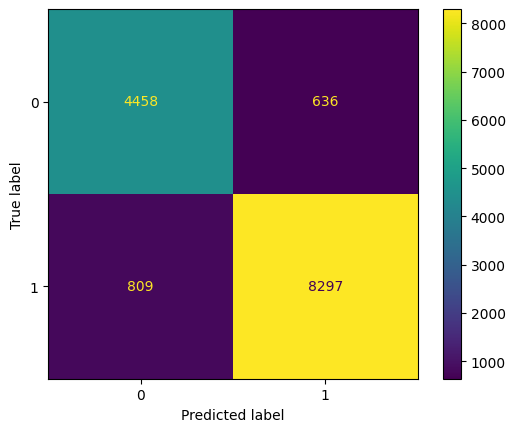

In [165]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_model.fit(X_resampled, y_resampled)

# Predicting the labels for the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

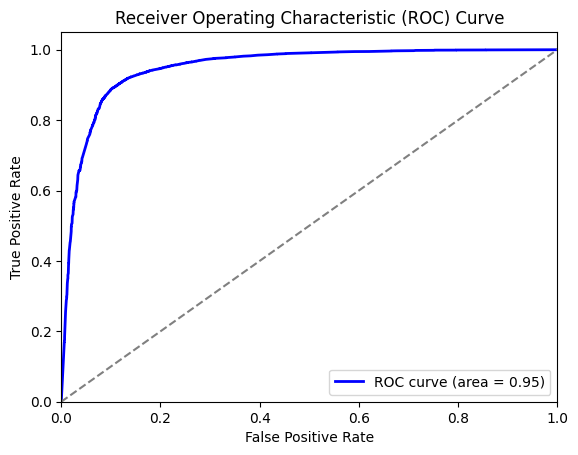

In [166]:
# Compute ROC curve and ROC AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [167]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Make sure this import is correct
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score: 0.8781690140845071

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5094
           1       0.91      0.90      0.90      9106

    accuracy                           0.88     14200
   macro avg       0.87      0.87      0.87     14200
weighted avg       0.88      0.88      0.88     14200



In [169]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [170]:
pip install numpy pandas matplotlib pillow wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


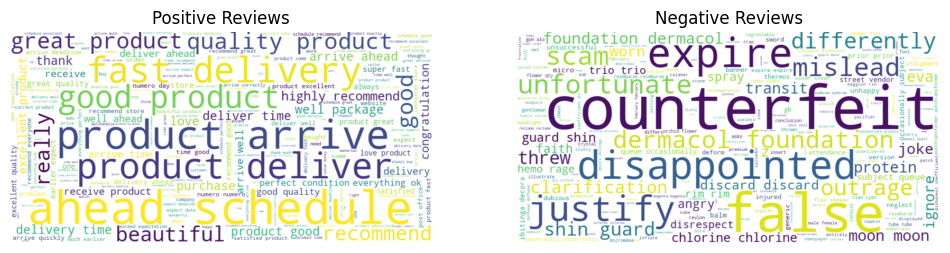

In [171]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Ensure you have NLTK stopwords
nltk.download('stopwords')

# Filter positive and negative reviews
positive_reviews = df_comments[df_comments.iloc[:, 4] == 1]['lemmatized_comments']
negative_reviews = df_comments[df_comments.iloc[:, 4] == 0]['lemmatized_comments']

# Combine all positive and negative comments into one large string
positive_text = ' '.join(positive_reviews.astype(str))
negative_text = ' '.join(negative_reviews.astype(str))

# Tokenize the text
positive_tokens = positive_text.split()
negative_tokens = negative_text.split()

# Define a set of stop words
stop_words = set(stopwords.words('english'))

# Count word frequencies
positive_word_counts = Counter(positive_tokens)
negative_word_counts = Counter(negative_tokens)

# Find common words in both positive and negative reviews
common_words = set(positive_word_counts.keys()).intersection(set(negative_word_counts.keys()))

# Exclude common words from negative reviews
filtered_negative_tokens = [word for word in negative_tokens if word not in common_words]

# Combine the filtered tokens into a new string for negative reviews
filtered_negative_text = ' '.join(filtered_negative_tokens)

# Create WordCloud objects
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_filtered_negative = WordCloud(width=800, height=400, background_color='white').generate(filtered_negative_text)

# Plot the positive word cloud
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

# Plot the filtered negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_filtered_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

In [176]:
# Save the trained model to a pickle file
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [178]:
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)